In [7]:
import pandas as pd

data = pd.read_csv('computed_1.csv')
for i in range(2,26):
  data2 = pd.read_csv('computed_'+str(i)+'.csv')
  data = pd.concat([data,data2])
data.reset_index(drop=True)

,additions,deletions,number_of_patches_so_far,initial_files_changed,max_files_addition,max_files_deletion,max_files_delta,max_files_size,commit_sbj,commit_msg,entropy,files_touched,has_topic,topic,topic_prevalency,mergeable,has_assignee,owner_is_submitter,project,project_age,project_prev_commits,created,updated,subimitted,eval_time,status,average_NUR,owener,dev_prev_exp,dev_merged_CR,change_id,id,decision_made,commit_time,duration_class,hotness_percentage,sent_on_friday,subsystems
0,4,2,1,1,4,2,0,413,pre-upload.py: import random,"pre-upload.py: import random\n\nAlso, fix whit...",0.000000,1,False,False,0.0,NaN,False,False,chromiumos/repohooks,0.0,0,1.302128e+09,1.302130e+09,1.302130e+09,2045.0,MERGED,0.000000,1000072,0,0,I3ab627e646d5ac11ad770e6acdfb731f8de1ffe1,chromiumos%2Frepohooks~master~I3ab627e646d5ac1...,True,18.0,0.0,0.000000,0.0,1.0
1,1,1,1,1,1,1,7,40574,pause,pause\n\nChange-Id: I808c88d53918a27def8ac0e55...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/third_party/kernel,0.0,0,1.303962e+09,1.304461e+09,-1.000000e+00,499879.0,ABANDONED,0.000000,1000072,1,1,I808c88d53918a27def8ac0e55cfdea02c9026a34,chromiumos%2Fthird_party%2Fkernel~master~I808c...,True,23.0,3.0,0.000000,0.0,1.0
2,3,0,1,1,3,0,57,2641,Update Presubmit,Update Presubmit\n\nChange-Id: I05a6fefa02cdee...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/overlays/chromiumos-overlay,0.0,0,1.304027e+09,1.341055e+09,-1.000000e+00,37027843.0,ABANDONED,0.000000,1000001,0,0,I05a6fefa02cdee7ae6f805bf34eb8d6c1c6d118e,chromiumos%2Foverlays%2Fchromiumos-overlay~0.1...,True,17.0,7.0,0.000000,0.0,1.0
3,2778,8,4,4,2721,8,73695,73695,pre-upload.py: Generalize a framework and add ...,pre-upload.py: Generalize a framework and add ...,0.152126,2,False,False,0.0,NaN,False,True,chromiumos/repohooks,1981947.0,1,1.304110e+09,1.304130e+09,1.304128e+09,19826.0,ABANDONED,0.500000,1000072,2,0,I4a4da9b5869b7350b0ed39a929bce505bdcf22d7,chromiumos%2Frepohooks~master~I4a4da9b5869b735...,True,16.0,1.0,0.500000,1.0,2.0
4,704,71,12,12,301,51,8354,17443,Modified gcc-9999 ebuild to allow building gcc...,Modified gcc-9999 ebuild to allow building gcc...,0.574242,6,False,False,0.0,NaN,False,True,chromiumos/overlays/chromiumos-overlay,97875.0,1,1.304125e+09,1.304566e+09,1.304566e+09,440975.0,MERGED,0.000000,1000067,0,0,Ib6f0a9a244f3d3fa670a5ab071a93e408a5bf810,chromiumos%2Foverlays%2Fchromiumos-overlay~mas...,True,20.0,3.0,0.000000,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498254,430,199,2,2,362,188,3912,51469,[Merge to M-71] (Reland of reland) top-chrome-...,[Merge to M-71] (Reland of reland) top-chrome-...,0.333894,4,False,False,0.0,NaN,False,True,chromium/src,120440921.0,169436,1.541043e+09,1.541043e+09,1.541043e+09,247.0,MERGED,38.000000,1125479,247,37,I82713fcf642e06cd8e62342d0291ca40e4cd6ffb,chromium%2Fsrc~refs%2Fbranch-heads%2F3578~I827...,True,23.0,0.0,0.000000,0.0,4.0
498255,3,1,2,2,3,1,27,69486,Fix crash when ble disconnect happens and devi...,Fix crash when ble disconnect happens and devi...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/third_party/bluez,119231550.0,402,1.541043e+09,1.541044e+09,1.541044e+09,486.0,MERGED,19.000000,1300993,16,9,I7d38fbd633a86c48ce7e6ab9d18a992d4c016148,chromiumos%2Fthird_party%2Fbluez~stabilize-jet...,True,23.0,0.0,1.000000,0.0,1.0
498256,2,8,2,2,2,8,0,42170,"Revert ""Disable a few more FilesAppBrowserTest...","Revert ""Disable a few more FilesAppBrowserTest...",0.000000,1,False,False,0.0,NaN,False,False,chromium/src,120442039.0,169437,1.541044e+09,1.541044e+09,1.541044e+09,16.0,MERGED,270.000000,1250573,206,17,I1bb7400826d3143641d97d8eaaf44b69ccd4e6b1,chromium%2Fsrc~master~I1bb7400826d3143641d97d8...,True,23.0,0.0,0.000000,0.0,1.0
498257,12030,54,2,2,12017,49,229865,1112208,Version 7.2.211,Version 7.2.211\n\nPerformance and stability i...,0.031200,3,False,False,0.0,NaN,False,True,v8/v8,103246241.0,16075,1.54104

In [8]:
data = data.rename(columns={"Unnamed: 0": "index","owener":"owner"})
data

,additions,deletions,number_of_patches_so_far,initial_files_changed,max_files_addition,max_files_deletion,max_files_delta,max_files_size,commit_sbj,commit_msg,entropy,files_touched,has_topic,topic,topic_prevalency,mergeable,has_assignee,owner_is_submitter,project,project_age,project_prev_commits,created,updated,subimitted,eval_time,status,average_NUR,owner,dev_prev_exp,dev_merged_CR,change_id,id,decision_made,commit_time,duration_class,hotness_percentage,sent_on_friday,subsystems
0,4,2,1,1,4,2,0,413,pre-upload.py: import random,"pre-upload.py: import random\n\nAlso, fix whit...",0.000000,1,False,False,0.0,NaN,False,False,chromiumos/repohooks,0.0,0,1.302128e+09,1.302130e+09,1.302130e+09,2045.0,MERGED,0.000000,1000072,0,0,I3ab627e646d5ac11ad770e6acdfb731f8de1ffe1,chromiumos%2Frepohooks~master~I3ab627e646d5ac1...,True,18.0,0.0,0.000000,0.0,1.0
1,1,1,1,1,1,1,7,40574,pause,pause\n\nChange-Id: I808c88d53918a27def8ac0e55...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/third_party/kernel,0.0,0,1.303962e+09,1.304461e+09,-1.000000e+00,499879.0,ABANDONED,0.000000,1000072,1,1,I808c88d53918a27def8ac0e55cfdea02c9026a34,chromiumos%2Fthird_party%2Fkernel~master~I808c...,True,23.0,3.0,0.000000,0.0,1.0
2,3,0,1,1,3,0,57,2641,Update Presubmit,Update Presubmit\n\nChange-Id: I05a6fefa02cdee...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/overlays/chromiumos-overlay,0.0,0,1.304027e+09,1.341055e+09,-1.000000e+00,37027843.0,ABANDONED,0.000000,1000001,0,0,I05a6fefa02cdee7ae6f805bf34eb8d6c1c6d118e,chromiumos%2Foverlays%2Fchromiumos-overlay~0.1...,True,17.0,7.0,0.000000,0.0,1.0
3,2778,8,4,4,2721,8,73695,73695,pre-upload.py: Generalize a framework and add ...,pre-upload.py: Generalize a framework and add ...,0.152126,2,False,False,0.0,NaN,False,True,chromiumos/repohooks,1981947.0,1,1.304110e+09,1.304130e+09,1.304128e+09,19826.0,ABANDONED,0.500000,1000072,2,0,I4a4da9b5869b7350b0ed39a929bce505bdcf22d7,chromiumos%2Frepohooks~master~I4a4da9b5869b735...,True,16.0,1.0,0.500000,1.0,2.0
4,704,71,12,12,301,51,8354,17443,Modified gcc-9999 ebuild to allow building gcc...,Modified gcc-9999 ebuild to allow building gcc...,0.574242,6,False,False,0.0,NaN,False,True,chromiumos/overlays/chromiumos-overlay,97875.0,1,1.304125e+09,1.304566e+09,1.304566e+09,440975.0,MERGED,0.000000,1000067,0,0,Ib6f0a9a244f3d3fa670a5ab071a93e408a5bf810,chromiumos%2Foverlays%2Fchromiumos-overlay~mas...,True,20.0,3.0,0.000000,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,430,199,2,2,362,188,3912,51469,[Merge to M-71] (Reland of reland) top-chrome-...,[Merge to M-71] (Reland of reland) top-chrome-...,0.333894,4,False,False,0.0,NaN,False,True,chromium/src,120440921.0,169436,1.541043e+09,1.541043e+09,1.541043e+09,247.0,MERGED,38.000000,1125479,247,37,I82713fcf642e06cd8e62342d0291ca40e4cd6ffb,chromium%2Fsrc~refs%2Fbranch-heads%2F3578~I827...,True,23.0,0.0,0.000000,0.0,4.0
18255,3,1,2,2,3,1,27,69486,Fix crash when ble disconnect happens and devi...,Fix crash when ble disconnect happens and devi...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/third_party/bluez,119231550.0,402,1.541043e+09,1.541044e+09,1.541044e+09,486.0,MERGED,19.000000,1300993,16,9,I7d38fbd633a86c48ce7e6ab9d18a992d4c016148,chromiumos%2Fthird_party%2Fbluez~stabilize-jet...,True,23.0,0.0,1.000000,0.0,1.0
18256,2,8,2,2,2,8,0,42170,"Revert ""Disable a few more FilesAppBrowserTest...","Revert ""Disable a few more FilesAppBrowserTest...",0.000000,1,False,False,0.0,NaN,False,False,chromium/src,120442039.0,169437,1.541044e+09,1.541044e+09,1.541044e+09,16.0,MERGED,270.000000,1250573,206,17,I1bb7400826d3143641d97d8eaaf44b69ccd4e6b1,chromium%2Fsrc~master~I1bb7400826d3143641d97d8...,True,23.0,0.0,0.000000,0.0,1.0
18257,12030,54,2,2,12017,49,229865,1112208,Version 7.2.211,Version 7.2.211\n\nPerformance and stability i...,0.031200,3,False,False,0.0,NaN,False,True,v8/v8,103246241.0,16075,1.541044e+09

In [9]:
# train_data = data.drop
only_determined = data[data['decision_made']==True].drop(['change_id','id'],axis=1)
only_determined

,additions,deletions,number_of_patches_so_far,initial_files_changed,max_files_addition,max_files_deletion,max_files_delta,max_files_size,commit_sbj,commit_msg,entropy,files_touched,has_topic,topic,topic_prevalency,mergeable,has_assignee,owner_is_submitter,project,project_age,project_prev_commits,created,updated,subimitted,eval_time,status,average_NUR,owner,dev_prev_exp,dev_merged_CR,decision_made,commit_time,duration_class,hotness_percentage,sent_on_friday,subsystems
0,4,2,1,1,4,2,0,413,pre-upload.py: import random,"pre-upload.py: import random\n\nAlso, fix whit...",0.000000,1,False,False,0.0,NaN,False,False,chromiumos/repohooks,0.0,0,1.302128e+09,1.302130e+09,1.302130e+09,2045.0,MERGED,0.000000,1000072,0,0,True,18.0,0.0,0.000000,0.0,1.0
1,1,1,1,1,1,1,7,40574,pause,pause\n\nChange-Id: I808c88d53918a27def8ac0e55...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/third_party/kernel,0.0,0,1.303962e+09,1.304461e+09,-1.000000e+00,499879.0,ABANDONED,0.000000,1000072,1,1,True,23.0,3.0,0.000000,0.0,1.0
2,3,0,1,1,3,0,57,2641,Update Presubmit,Update Presubmit\n\nChange-Id: I05a6fefa02cdee...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/overlays/chromiumos-overlay,0.0,0,1.304027e+09,1.341055e+09,-1.000000e+00,37027843.0,ABANDONED,0.000000,1000001,0,0,True,17.0,7.0,0.000000,0.0,1.0
3,2778,8,4,4,2721,8,73695,73695,pre-upload.py: Generalize a framework and add ...,pre-upload.py: Generalize a framework and add ...,0.152126,2,False,False,0.0,NaN,False,True,chromiumos/repohooks,1981947.0,1,1.304110e+09,1.304130e+09,1.304128e+09,19826.0,ABANDONED,0.500000,1000072,2,0,True,16.0,1.0,0.500000,1.0,2.0
4,704,71,12,12,301,51,8354,17443,Modified gcc-9999 ebuild to allow building gcc...,Modified gcc-9999 ebuild to allow building gcc...,0.574242,6,False,False,0.0,NaN,False,True,chromiumos/overlays/chromiumos-overlay,97875.0,1,1.304125e+09,1.304566e+09,1.304566e+09,440975.0,MERGED,0.000000,1000067,0,0,True,20.0,3.0,0.000000,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,430,199,2,2,362,188,3912,51469,[Merge to M-71] (Reland of reland) top-chrome-...,[Merge to M-71] (Reland of reland) top-chrome-...,0.333894,4,False,False,0.0,NaN,False,True,chromium/src,120440921.0,169436,1.541043e+09,1.541043e+09,1.541043e+09,247.0,MERGED,38.000000,1125479,247,37,True,23.0,0.0,0.000000,0.0,4.0
18255,3,1,2,2,3,1,27,69486,Fix crash when ble disconnect happens and devi...,Fix crash when ble disconnect happens and devi...,0.000000,1,False,False,0.0,NaN,False,False,chromiumos/third_party/bluez,119231550.0,402,1.541043e+09,1.541044e+09,1.541044e+09,486.0,MERGED,19.000000,1300993,16,9,True,23.0,0.0,1.000000,0.0,1.0
18256,2,8,2,2,2,8,0,42170,"Revert ""Disable a few more FilesAppBrowserTest...","Revert ""Disable a few more FilesAppBrowserTest...",0.000000,1,False,False,0.0,NaN,False,False,chromium/src,120442039.0,169437,1.541044e+09,1.541044e+09,1.541044e+09,16.0,MERGED,270.000000,1250573,206,17,True,23.0,0.0,0.000000,0.0,1.0
18257,12030,54,2,2,12017,49,229865,1112208,Version 7.2.211,Version 7.2.211\n\nPerformance and stability i...,0.031200,3,False,False,0.0,NaN,False,True,v8/v8,103246241.0,16075,1.541044e+09,1.541044e+09,1.541044e+09,3.0,MERGED,850.000000,1274527,1208,15,True,23.0,0.0,1.000000,0.0,3.0


In [13]:
import re
# def denoiseTokenize(sentence):
    # sentence = re.sub(r"[\*\"“”\n\\…\+\/\=\(\)‘•:\[\]\|’\!;><]", " ", str(sentence))
    # sentence = re.sub(r"[ ]+", " ", sentence)
    # sentence = re.sub(r"\!+", "!", sentence)
    # sentence = re.sub(r"\,+", ",", sentence)
    # sentence = re.sub(r"\?+", "?", sentence)
    # sentence = re.sub(r"\&+", " ", sentence)
    # sentence = re.sub(r"\'s", " ", sentence)
    # sentence = sentence.lower()
def preprocess_text(sen):
    #omit last_line since it just show commit id
    try:
      sentence = "\n".join(sen.split("\n")[:-2])
    except:
      print(sen)
      return

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z.]', ' ', sentence) #TODO: check if it is needed to omit numbers

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
    
only_determined['commit_sbj'] = only_determined['commit_sbj'].apply(preprocess_text)
only_determined['commit_msg'] = only_determined['commit_msg'].apply(preprocess_text)


None
None
None
None
None
None
None
None
nan


[array([1.0176e+04, 2.0000e+00]), array([ 522782., 1291657.])]

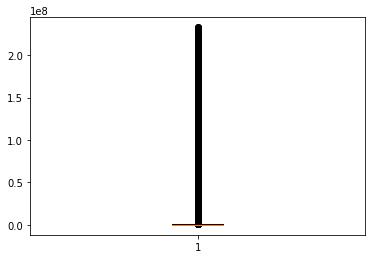

In [22]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore())
# print(z)
# threshold = 3
# print(np.where(z > 3))
import matplotlib.pyplot as plt
B = plt.boxplot(only_determined['eval_time'])
[item.get_ydata() for item in  B['whiskers']]

In [24]:
projects_list = list(only_determined.project.unique())
project_to_index = {}
index_to_project = {}

def make_category():
  for project,i in enumerate(projects_list):
    project_to_index[i] = project
    index_to_project[project] = i
  return project_to_index, index_to_project
project_to_index, index_to_project = make_category()


def convert_project_to_code(row):
  # print(row)
  row['project_code'] = project_to_index[row['project']]
  return row
only_determined = only_determined.apply(convert_project_to_code,axis=1)

In [25]:
projects_list = list(only_determined.project.unique())
project_to_index = {}
index_to_project = {}

def make_category():
  for project,i in enumerate(projects_list):
    project_to_index[i] = project
    index_to_project[project] = i
  return project_to_index, index_to_project
project_to_index, index_to_project = make_category()


def convert_project_to_code(row):
  # print(row)
  row['project_code'] = project_to_index[row['project']]
  return row
only_determined = only_determined.apply(convert_project_to_code,axis=1).drop(['project'], axis=1)

In [26]:
only_determined['topic'] = only_determined['topic'].fillna(-1)

topics_list = list(only_determined.topic.unique())
topic_to_index = {}
index_to_topic = {}

def make_topic_categories():
  for topic,i in enumerate(topics_list):
    topic_to_index[i] = topic
    index_to_topic[topic] = i
  return topic_to_index, index_to_topic
topic_to_index, index_to_topic = make_topic_categories()


def convert_topic_to_code(row):
  row['topic_code'] = topic_to_index[row['topic']]
  return row
only_determined = only_determined.apply(convert_topic_to_code,axis=1).drop(['topic'], axis=1)

only_determined

,additions,deletions,number_of_patches_so_far,initial_files_changed,max_files_addition,max_files_deletion,max_files_delta,max_files_size,commit_sbj,commit_msg,entropy,files_touched,has_topic,topic_prevalency,mergeable,has_assignee,owner_is_submitter,project_age,project_prev_commits,created,updated,subimitted,eval_time,status,average_NUR,owner,dev_prev_exp,dev_merged_CR,decision_made,commit_time,duration_class,hotness_percentage,sent_on_friday,subsystems,project_code,topic_code
0,4,2,1,1,4,2,0,413,,pre upload.py import random Also fix white spa...,0.000000,1,False,0.0,NaN,False,False,0.0,0,1.302128e+09,1.302130e+09,1.302130e+09,2045.0,MERGED,0.000000,1000072,0,0,True,18.0,0.0,0.000000,0.0,1.0,0,0
1,1,1,1,1,1,1,7,40574,,pause,0.000000,1,False,0.0,NaN,False,False,0.0,0,1.303962e+09,1.304461e+09,-1.000000e+00,499879.0,ABANDONED,0.000000,1000072,1,1,True,23.0,3.0,0.000000,0.0,1.0,1,0
2,3,0,1,1,3,0,57,2641,,Update Presubmit,0.000000,1,False,0.0,NaN,False,False,0.0,0,1.304027e+09,1.341055e+09,-1.000000e+00,37027843.0,ABANDONED,0.000000,1000001,0,0,True,17.0,7.0,0.000000,0.0,1.0,2,0
3,2778,8,4,4,2721,8,73695,73695,,pre upload.py Generalize framework and add ker...,0.152126,2,False,0.0,NaN,False,True,1981947.0,1,1.304110e+09,1.304130e+09,1.304128e+09,19826.0,ABANDONED,0.500000,1000072,2,0,True,16.0,1.0,0.500000,1.0,2.0,0,0
4,704,71,12,12,301,51,8354,17443,,Modified gcc ebuild to allow building gcc . . ...,0.574242,6,False,0.0,NaN,False,True,97875.0,1,1.304125e+09,1.304566e+09,1.304566e+09,440975.0,MERGED,0.000000,1000067,0,0,True,20.0,3.0,0.000000,1.0,6.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,430,199,2,2,362,188,3912,51469,,Merge to Reland of reland top chrome slide Di...,0.333894,4,False,0.0,NaN,False,True,120440921.0,169436,1.541043e+09,1.541043e+09,1.541043e+09,247.0,MERGED,38.000000,1125479,247,37,True,23.0,0.0,0.000000,0.0,4.0,241,0
18255,3,1,2,2,3,1,27,69486,,Fix crash when ble disconnect happens and devi...,0.000000,1,False,0.0,NaN,False,False,119231550.0,402,1.541043e+09,1.541044e+09,1.541044e+09,486.0,MERGED,19.000000,1300993,16,9,True,23.0,0.0,1.000000,0.0,1.0,242,0
18256,2,8,2,2,2,8,0,42170,,Revert Disable few more FilesAppBrowserTest on...,0.000000,1,False,0.0,NaN,False,False,120442039.0,169437,1.541044e+09,1.541044e+09,1.541044e+09,16.0,MERGED,270.000000,1250573,206,17,True,23.0,0.0,0.000000,0.0,1.0,241,0
18257,12030,54,2,2,12017,49,229865,1112208,,Version . . Performance and stability improvem...,0.031200,3,False,0.0,NaN,False,True,103246241.0,16075,1.541044e+09,1.541044e+09,1.541044e+09,3.0,MERGED,850.000000,1274527,1208,15,True,23.0,0.0,1.000000,0.0,3.0,257,0


In [27]:
status_list = list(only_determined.status.unique())
status_to_index = {}
index_to_status = {}

def make_status_categories():
  for status,i in enumerate(status_list):
    status_to_index[i] = status
    index_to_status[status] = i
  return status_to_index, index_to_status
status_to_index, index_to_status = make_status_categories()


def convert_status_to_code(row):
  row['status_code'] = status_to_index[row['status']]
  return row
only_determined = only_determined.apply(convert_status_to_code,axis=1).drop(['status'], axis=1)

In [28]:
owner_list = list(only_determined.owner.unique())
owner_to_index = {}
index_to_owner = {}

def make_owner_categories():
  for owner,i in enumerate(owner_list):
    owner_to_index[i] = owner
    index_to_owner[owner] = i
  return owner_to_index, index_to_owner
owner_to_index, index_to_owner = make_owner_categories()


def convert_owner_to_code(row):
  row['owner_code'] = owner_to_index[row['owner']]
  return row
only_determined = only_determined.apply(convert_owner_to_code,axis=1).drop(['owner'], axis=1)

In [29]:
only_determined['mergeable'] = only_determined['mergeable'].fillna(-1)

In [30]:
only_determined

,additions,deletions,number_of_patches_so_far,initial_files_changed,max_files_addition,max_files_deletion,max_files_delta,max_files_size,commit_sbj,commit_msg,entropy,files_touched,has_topic,topic_prevalency,mergeable,has_assignee,owner_is_submitter,project_age,project_prev_commits,created,updated,subimitted,eval_time,average_NUR,dev_prev_exp,dev_merged_CR,decision_made,commit_time,duration_class,hotness_percentage,sent_on_friday,subsystems,project_code,topic_code,status_code,owner_code
0,4,2,1,1,4,2,0,413,,pre upload.py import random Also fix white spa...,0.000000,1,False,0.0,-1.0,False,False,0.0,0,1.302128e+09,1.302130e+09,1.302130e+09,2045.0,0.000000,0,0,True,18.0,0.0,0.000000,0.0,1.0,0,0,0,0
1,1,1,1,1,1,1,7,40574,,pause,0.000000,1,False,0.0,-1.0,False,False,0.0,0,1.303962e+09,1.304461e+09,-1.000000e+00,499879.0,0.000000,1,1,True,23.0,3.0,0.000000,0.0,1.0,1,0,1,0
2,3,0,1,1,3,0,57,2641,,Update Presubmit,0.000000,1,False,0.0,-1.0,False,False,0.0,0,1.304027e+09,1.341055e+09,-1.000000e+00,37027843.0,0.000000,0,0,True,17.0,7.0,0.000000,0.0,1.0,2,0,1,1
3,2778,8,4,4,2721,8,73695,73695,,pre upload.py Generalize framework and add ker...,0.152126,2,False,0.0,-1.0,False,True,1981947.0,1,1.304110e+09,1.304130e+09,1.304128e+09,19826.0,0.500000,2,0,True,16.0,1.0,0.500000,1.0,2.0,0,0,1,0
4,704,71,12,12,301,51,8354,17443,,Modified gcc ebuild to allow building gcc . . ...,0.574242,6,False,0.0,-1.0,False,True,97875.0,1,1.304125e+09,1.304566e+09,1.304566e+09,440975.0,0.000000,0,0,True,20.0,3.0,0.000000,1.0,6.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,430,199,2,2,362,188,3912,51469,,Merge to Reland of reland top chrome slide Di...,0.333894,4,False,0.0,-1.0,False,True,120440921.0,169436,1.541043e+09,1.541043e+09,1.541043e+09,247.0,38.000000,247,37,True,23.0,0.0,0.000000,0.0,4.0,241,0,0,1559
18255,3,1,2,2,3,1,27,69486,,Fix crash when ble disconnect happens and devi...,0.000000,1,False,0.0,-1.0,False,False,119231550.0,402,1.541043e+09,1.541044e+09,1.541044e+09,486.0,19.000000,16,9,True,23.0,0.0,1.000000,0.0,1.0,242,0,0,4861
18256,2,8,2,2,2,8,0,42170,,Revert Disable few more FilesAppBrowserTest on...,0.000000,1,False,0.0,-1.0,False,False,120442039.0,169437,1.541044e+09,1.541044e+09,1.541044e+09,16.0,270.000000,206,17,True,23.0,0.0,0.000000,0.0,1.0,241,0,0,3759
18257,12030,54,2,2,12017,49,229865,1112208,,Version . . Performance and stability improvem...,0.031200,3,False,0.0,-1.0,False,True,103246241.0,16075,1.541044e+09,1.541044e+09,1.541044e+09,3.0,850.000000,1208,15,True,23.0,0.0,1.000000,0.0,3.0,257,0,0,4452


In [31]:
def separate_data_regression(data):
  text_columns = ['commit_sbj','commit_msg']
  clmns = data.columns
  for textual_clmn in text_columns:
    clmns = clmns[clmns!=textual_clmn]

  target_info = ['eval_time']
  for target_clmn in target_info:
    clmns = clmns[clmns!=target_clmn]

  future_clmns = ['number_of_patches_so_far','status','decision_made','duration_class']
  for future_clmn in future_clmns:
    clmns = clmns[clmns!=future_clmn]

  clmns = clmns.insert(0,'commit_msg')
  clmns = clmns.insert(0,'commit_sbj')
  numerical_inputs = data[clmns]
  textual_inputs = data[text_columns]
  target = data[target_info]
  print(clmns)
  return textual_inputs, numerical_inputs, target

def separate_data_classification(data):
  text_columns = ['commit_sbj','commit_msg']
  clmns = data.columns
  for textual_clmn in text_columns:
    clmns = clmns[clmns!=textual_clmn]

  target_info = ['duration_class']
  for target_clmn in target_info:
    clmns = clmns[clmns!=target_clmn]

  future_clmns = ['number_of_patches_so_far','status','decision_made','eval_time']
  for future_clmn in future_clmns:
    clmns = clmns[clmns!=future_clmn]

  clmns= clmns.insert(0,'commit_msg')
  clmns= clmns.insert(0,'commit_sbj')
  numerical_inputs = data[clmns]
  textual_inputs = data[text_columns]
  target = data[target_info]
  print(clmns)
  return textual_inputs, numerical_inputs, target

In [32]:
def convert_target_to_hour(row):
  row['eval_time'] = row['eval_time']/60
  return row
only_determined = only_determined.apply(convert_target_to_hour,axis=1).drop(['created','updated'], axis=1)

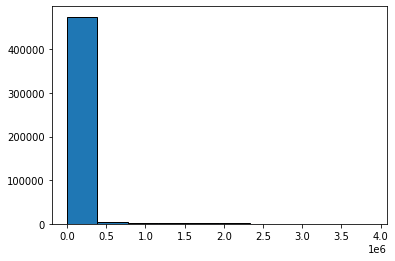

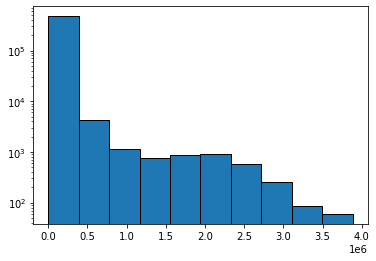

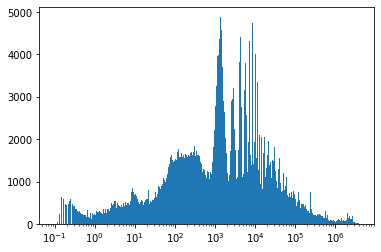

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

frq, edges = np.histogram(only_determined['eval_time'], bins=10)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

frq, edges = np.histogram(only_determined['eval_time'], bins=10)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
plt.gca().set_yscale("log")

plt.show()
pl.hist(only_determined['eval_time'], bins=np.logspace(np.log10(0.1),np.log10(np.max(only_determined['eval_time'])), 500))
pl.gca().set_xscale("log")
pl.show()

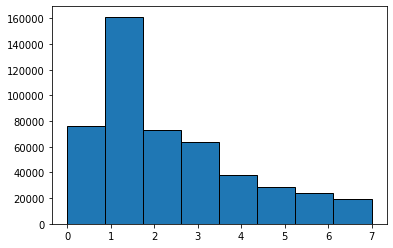

In [34]:
import numpy as np
import matplotlib.pyplot as plt


frq, edges = np.histogram(only_determined['duration_class'], bins=8)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

In [35]:
only_determined

,additions,deletions,number_of_patches_so_far,initial_files_changed,max_files_addition,max_files_deletion,max_files_delta,max_files_size,commit_sbj,commit_msg,entropy,files_touched,has_topic,topic_prevalency,mergeable,has_assignee,owner_is_submitter,project_age,project_prev_commits,subimitted,eval_time,average_NUR,dev_prev_exp,dev_merged_CR,decision_made,commit_time,duration_class,hotness_percentage,sent_on_friday,subsystems,project_code,topic_code,status_code,owner_code
0,4,2,1,1,4,2,0,413,,pre upload.py import random Also fix white spa...,0.000000,1,False,0.0,-1.0,False,False,0.0,0,1.302130e+09,34.083333,0.000000,0,0,True,18.0,0.0,0.000000,0.0,1.0,0,0,0,0
1,1,1,1,1,1,1,7,40574,,pause,0.000000,1,False,0.0,-1.0,False,False,0.0,0,-1.000000e+00,8331.316667,0.000000,1,1,True,23.0,3.0,0.000000,0.0,1.0,1,0,1,0
2,3,0,1,1,3,0,57,2641,,Update Presubmit,0.000000,1,False,0.0,-1.0,False,False,0.0,0,-1.000000e+00,617130.716667,0.000000,0,0,True,17.0,7.0,0.000000,0.0,1.0,2,0,1,1
3,2778,8,4,4,2721,8,73695,73695,,pre upload.py Generalize framework and add ker...,0.152126,2,False,0.0,-1.0,False,True,1981947.0,1,1.304128e+09,330.433333,0.500000,2,0,True,16.0,1.0,0.500000,1.0,2.0,0,0,1,0
4,704,71,12,12,301,51,8354,17443,,Modified gcc ebuild to allow building gcc . . ...,0.574242,6,False,0.0,-1.0,False,True,97875.0,1,1.304566e+09,7349.583333,0.000000,0,0,True,20.0,3.0,0.000000,1.0,6.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,430,199,2,2,362,188,3912,51469,,Merge to Reland of reland top chrome slide Di...,0.333894,4,False,0.0,-1.0,False,True,120440921.0,169436,1.541043e+09,4.116667,38.000000,247,37,True,23.0,0.0,0.000000,0.0,4.0,241,0,0,1559
18255,3,1,2,2,3,1,27,69486,,Fix crash when ble disconnect happens and devi...,0.000000,1,False,0.0,-1.0,False,False,119231550.0,402,1.541044e+09,8.100000,19.000000,16,9,True,23.0,0.0,1.000000,0.0,1.0,242,0,0,4861
18256,2,8,2,2,2,8,0,42170,,Revert Disable few more FilesAppBrowserTest on...,0.000000,1,False,0.0,-1.0,False,False,120442039.0,169437,1.541044e+09,0.266667,270.000000,206,17,True,23.0,0.0,0.000000,0.0,1.0,241,0,0,3759
18257,12030,54,2,2,12017,49,229865,1112208,,Version . . Performance and stability improvem...,0.031200,3,False,0.0,-1.0,False,True,103246241.0,16075,1.541044e+09,0.050000,850.000000,1208,15,True,23.0,0.0,1.000000,0.0,3.0,257,0,0,4452


In [36]:
input['commit_msg']


TypeError: ignored

In [37]:
_, input, output = separate_data_regression(only_determined)
input.to_csv('inputs.csv',index=False)
output.to_csv('outputs.csv',index=False)

Index(['commit_sbj', 'commit_msg', 'additions', 'deletions',
       'initial_files_changed', 'max_files_addition', 'max_files_deletion',
       'max_files_delta', 'max_files_size', 'entropy', 'files_touched',
       'has_topic', 'topic_prevalency', 'mergeable', 'has_assignee',
       'owner_is_submitter', 'project_age', 'project_prev_commits',
       'subimitted', 'average_NUR', 'dev_prev_exp', 'dev_merged_CR',
       'commit_time', 'hotness_percentage', 'sent_on_friday', 'subsystems',
       'project_code', 'topic_code', 'status_code', 'owner_code'],
      dtype='object')


In [39]:
_, input, output = separate_data_classification(only_determined)
input.to_csv('class_input.csv',index=False)
output.to_csv('class_outputs.csv',index=False)

Index(['commit_sbj', 'commit_msg', 'additions', 'deletions',
       'initial_files_changed', 'max_files_addition', 'max_files_deletion',
       'max_files_delta', 'max_files_size', 'entropy', 'files_touched',
       'has_topic', 'topic_prevalency', 'mergeable', 'has_assignee',
       'owner_is_submitter', 'project_age', 'project_prev_commits',
       'subimitted', 'average_NUR', 'dev_prev_exp', 'dev_merged_CR',
       'commit_time', 'hotness_percentage', 'sent_on_friday', 'subsystems',
       'project_code', 'topic_code', 'status_code', 'owner_code'],
      dtype='object')


In [41]:
from google.colab import files

files.download('class_inputs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
from google.colab import files

files.download('inputs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>